"Australian Vehicle Price Prediction"

Dataset link: https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices/

Objective : To train different Machine Learning models to predict the vehicle price.

In [ ]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [ ]:
# reading dataset
data = pd.read_csv("Australian Vehicle Prices.csv")

#Data Analysis

In [ ]:
print("The Shape of Dataset: " ,data.shape)
print("Number of Samples: " ,data.shape[0])
print("Number of Features: " ,data.shape[1])

The Shape of Dataset:  (16734, 19)

Number of Samples:  16734

Number of Features:  19


In [ ]:
data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [ ]:
print("The columns of the dataset is: \n",data.columns)

The columns of the dataset is: 

 Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',

       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',

       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',

       'BodyType', 'Doors', 'Seats', 'Price'],

      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16734 entries, 0 to 16733

Data columns (total 19 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Brand              16733 non-null  object 

 1   Year               16733 non-null  float64

 2   Model              16733 non-null  object 

 3   Car/Suv            16706 non-null  object 

 4   Title              16733 non-null  object 

 5   UsedOrNew          16733 non-null  object 

 6   Transmission       16733 non-null  object 

 7   Engine             16733 non-null  object 

 8   DriveType          16733 non-null  object 

 9   FuelType           16733 non-null  object 

 10  FuelConsumption    16733 non-null  object 

 11  Kilometres         16733 non-null  object 

 12  ColourExtInt       16733 non-null  object 

 13  Location           16284 non-null  object 

 14  CylindersinEngine  16733 non-null  object 

 15  BodyType           16452 non-null  object 

 16  D


# Regex to extract numbers from the columns

In [ ]:
# Helper function to extract numbers from string columns
def extract_number(data: 'pd.DataFrame',
                  col: 'str',
                  pattern: 'str') -> 'pd.Series':
   return data[col].str.extract(pattern, expand=False).astype('float32')

In [ ]:
# We use the previous hepler function to extract numbers from string columns
data['Engine'] = extract_number(data, col='Engine', pattern=r'.*?(\d+\.?\d*) L')
data['FuelConsumption'] = extract_number(data, col='FuelConsumption', pattern=r'(\d+\.?\d*) L.*')
data['CylindersinEngine'] = extract_number(data, col='CylindersinEngine', pattern=r'(\d+) (?:cyl|L)')
data['Doors'] = extract_number(data, col='Doors', pattern=r'(\d+) Doors')
data['Seats'] = extract_number(data, col='Seats', pattern=r'(\d+) Seats')

data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,2.2,AWD,Diesel,8.7,5595,White / Black,"Caringbah, NSW",4.0,SUV,4.0,7.0,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,1.5,Front,Premium,6.7,16,Black / Black,"Brookvale, NSW",4.0,Hatchback,5.0,5.0,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,2.0,Rear,Premium,6.6,8472,Grey / White,"Sylvania, NSW",4.0,Coupe,2.0,4.0,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,5.5,Rear,Premium,11.0,136517,White / Brown,"Mount Druitt, NSW",8.0,Coupe,2.0,4.0,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,1.3,Front,Unleaded,6.0,1035,Grey / Black,"Castle Hill, NSW",4.0,SUV,4.0,5.0,34990


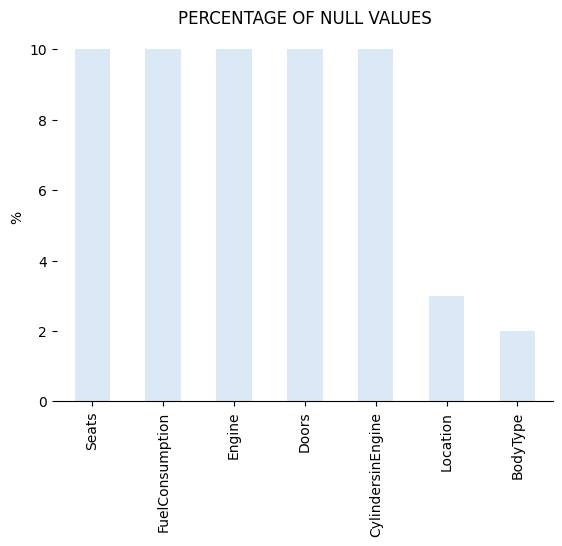

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
percentage_nulls = np.round((data.isnull().sum() / len(data) * 100).sort_values(ascending=False))
percentage_nulls = percentage_nulls[percentage_nulls != 0]

# You can specify the color directly in the plot method
sns.set_palette('Blues')
percentage_nulls.plot(kind='bar')
plt.xticks(rotation=90)
plt.title("PERCENTAGE OF NULL VALUES")
sns.despine(left=True)
plt.ylabel("%")
plt.show()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(keep=False, inplace=True)

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()/len(data)

Brand                0.0
Year                 0.0
Model                0.0
Car/Suv              0.0
Title                0.0
UsedOrNew            0.0
Transmission         0.0
Engine               0.0
DriveType            0.0
FuelType             0.0
FuelConsumption      0.0
Kilometres           0.0
ColourExtInt         0.0
Location             0.0
CylindersinEngine    0.0
BodyType             0.0
Doors                0.0
Seats                0.0
Price                0.0
dtype: float64

In [ ]:
Categorical_data = data.select_dtypes(include=['object'])
print(Categorical_data)

               Brand    Model               Car/Suv  \

0          Ssangyong   Rexton  Sutherland Isuzu Ute   

1                 MG      MG3             Hatchback   

2                BMW     430I                 Coupe   

3      Mercedes-Benz     E500                 Coupe   

4            Renault   Arkana                   SUV   

...              ...      ...                   ...   

16727        Hyundai      I30                 Wagon   

16728         Nissan  Qashqai                   SUV   

16731         Suzuki   Vitara   Bremer Suzuki - New   

16732  Mercedes-Benz   GLC250                   SUV   

16733  Mercedes-Benz     C200                 Sedan   



                                           Title UsedOrNew Transmission  \

0           2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   

1      2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   

2                          2022 BMW 430I M Sport      USED    Automatic   

3               2011 M

In [ ]:
data['Kilometres'] = pd.to_numeric(data['Kilometres'], errors='coerce')
data["Price"] = pd.to_numeric(data['Price'], errors='coerce')
Numerical_data = data.select_dtypes(include=['float'])
print(Numerical_data)

         Year  Engine  FuelConsumption  Kilometres  CylindersinEngine  Doors  \

0      2022.0     2.2              8.7      5595.0                4.0    4.0   

1      2022.0     1.5              6.7        16.0                4.0    5.0   

2      2022.0     2.0              6.6      8472.0                4.0    2.0   

3      2011.0     5.5             11.0    136517.0                8.0    2.0   

4      2022.0     1.3              6.0      1035.0                4.0    4.0   

...       ...     ...              ...         ...                ...    ...   

16727  2015.0     1.6              6.9     54359.0                4.0    4.0   

16728  2021.0     2.0              6.9     32977.0                4.0    4.0   

16731  2022.0     1.6              6.2      5165.0                4.0    4.0   

16732  2016.0     2.0              7.2     85525.0                4.0    4.0   

16733  2021.0     2.0              7.0     31852.0                4.0    4.0   



       Seats     Price  



#Data Cleaning

In [ ]:
print('The Unique values of Engine column: ',data['Engine'].value_counts().unique(),'\n')
print('The Unique values of Fuel Consumption: ',data['FuelConsumption'].value_counts().unique(),'\n')
print('The Unique values of Kilometres column: ',data['Kilometres'].value_counts().unique(),'\n')
print('The Unique values of Cylinders in Engine column: ',data['CylindersinEngine'].value_counts().unique(),'\n')
print('The Unique values of Doors column: ',data['Doors'].value_counts().unique(),'\n')
print('The Unique values of Seats column: ',data['Seats'].value_counts().unique(),'\n')

The Unique values of Engine column:  [3844 1649 1203  830  756  702  583  562  508  498  456  370  354  287

  217  203  188  153  149  115   90   83   80   75   68   52   50   49

   30   22   21   20   19   16   14   12    6    5    4    3    2    1] 



The Unique values of Fuel Consumption:  [703 506 468 436 400 398 396 353 352 337 299 294 285 260 258 257 256 255

 251 247 245 239 238 234 232 216 211 210 205 204 197 170 165 154 152 149

 140 134 131 116 114 111 108 105 102 100  98  97  96  94  83  81  80  72

  71  70  63  62  59  58  52  51  44  43  40  35  31  29  28  23  22  21

  19  18  17  16  15  14  12  11  10   9   8   7   6   4   3   2   1] 



The Unique values of Kilometres column:  [118  82  68  59  43  34  30  29  27  22  20  19  15  13  12  10   9   8

   7   6   5   4   3   2   1] 



The Unique values of Cylinders in Engine column:  [11202  1982   585   399   309    90    11     4     3] 



The Unique values of Doors column:  [10947  2477   971   190] 



The Uniq

In [ ]:
# Remove missing values


data['Transmission'] = data['Transmission'].replace('-', 'Other')
data['FuelType'] = data['FuelType'].replace('-', 'Other')
data['Engine'] = data['Engine'].replace('NaN', data['Engine'].mean())
data['FuelConsumption'] = data['FuelConsumption'].replace('NaN', data['FuelConsumption'].mean())
data['CylindersinEngine'] = data['CylindersinEngine'].replace('NaN', data['CylindersinEngine'].mean())
data['Doors'] = data['Doors'].replace('NaN', data['Doors'].mean())
data['Seats'] = data['Seats'].replace('NaN', data['Seats'].mean())
data['Kilometres'] = data['Kilometres'].fillna(data['Kilometres'].mean())
data.dropna(subset=['Price'], inplace=True)


In [ ]:
data.isnull().sum()/len(data)

Brand                0.0
Year                 0.0
Model                0.0
Car/Suv              0.0
Title                0.0
UsedOrNew            0.0
Transmission         0.0
Engine               0.0
DriveType            0.0
FuelType             0.0
FuelConsumption      0.0
Kilometres           0.0
ColourExtInt         0.0
Location             0.0
CylindersinEngine    0.0
BodyType             0.0
Doors                0.0
Seats                0.0
Price                0.0
dtype: float64

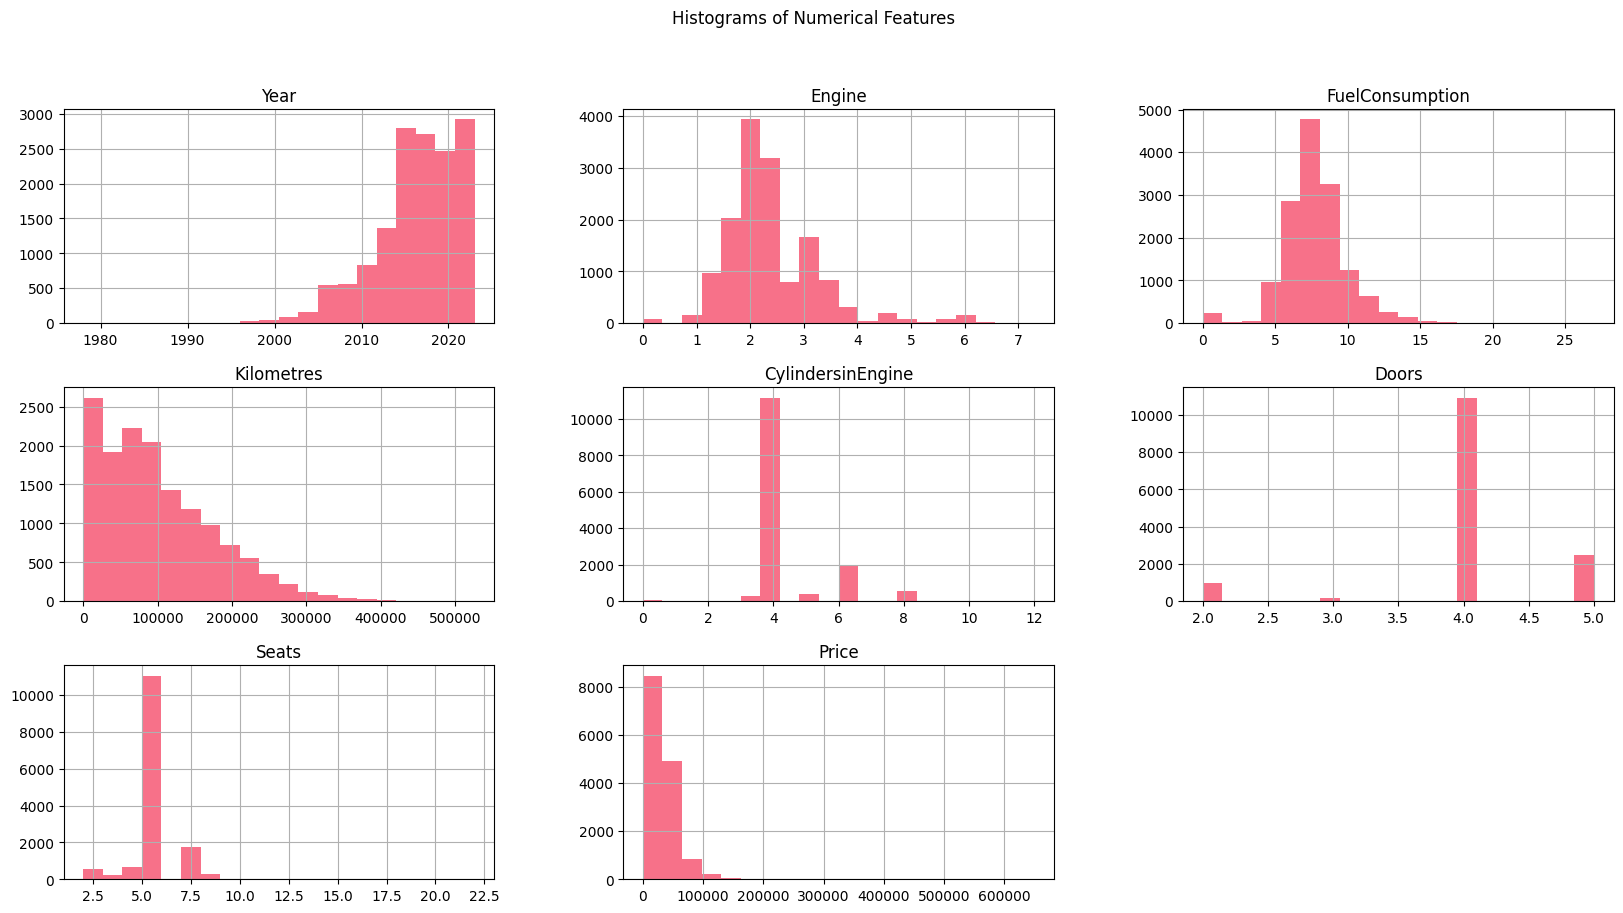

In [ ]:
data.hist(bins=20, figsize=(20, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
lb = LabelEncoder()
ss = StandardScaler()
# Normalizing the data
data['Price'] = pd.to_numeric(data['Price'], errors='coerce', downcast='integer')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce', downcast='integer')
data['Kilometres'] = pd.to_numeric(data['Kilometres'], errors='coerce', downcast='integer')
data['Price'] = ss.fit_transform(data[['Price']])
data['Year'] = ss.fit_transform(data[['Year']])
data['Kilometres'] = ss.fit_transform(data[['Kilometres']])

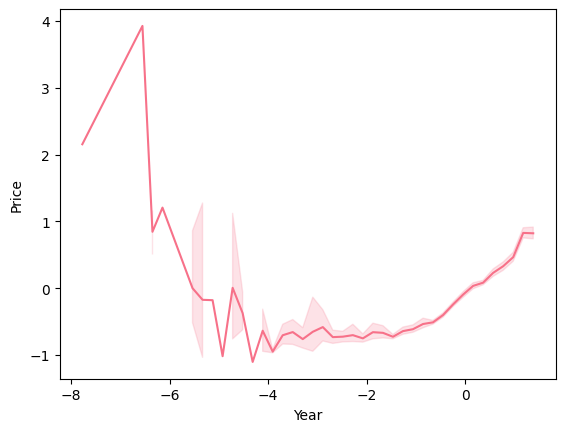

In [ ]:
# Checking variation of price of vehicle wrt year.



sns.lineplot(data=data, x='Year', y='Price')
plt.show()

<Axes: xlabel='UsedOrNew', ylabel='Price'>

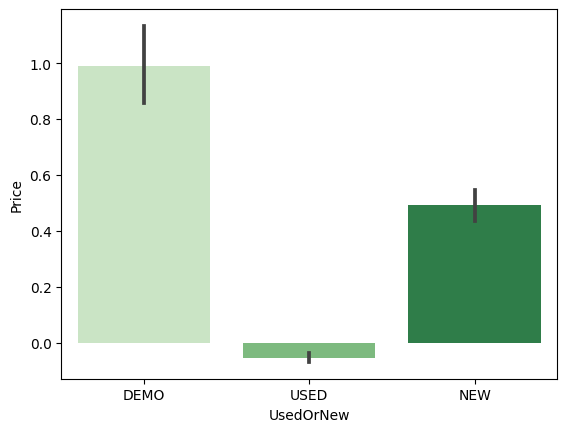

In [ ]:
sns.barplot(data=data, x='UsedOrNew', y='Price', palette='Greens')

<Axes: xlabel='FuelType', ylabel='Price'>

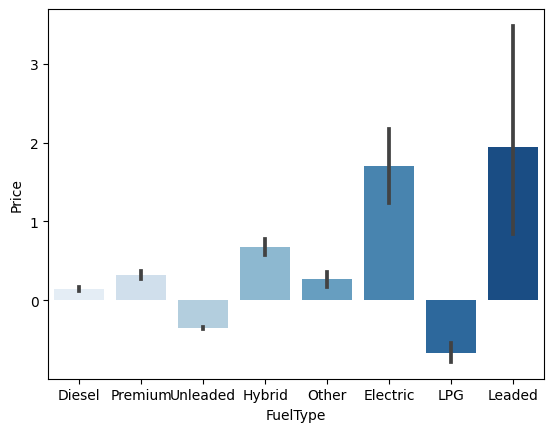

In [ ]:
sns.barplot(data=data, x='FuelType', y='Price', palette='Blues')

<Axes: xlabel='DriveType', ylabel='Price'>

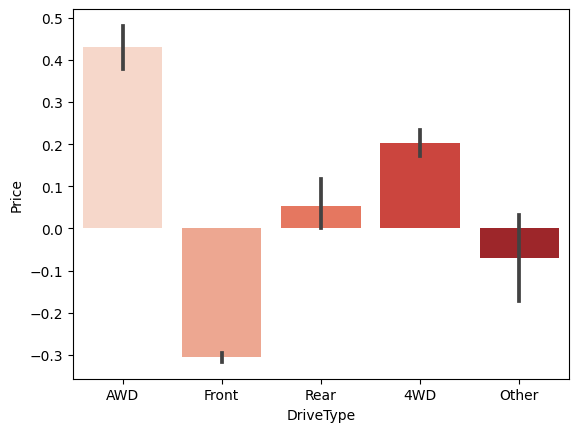

In [ ]:
sns.barplot(data=data, x='DriveType', y='Price', palette='Reds')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '10.0'),
  Text(8, 0, '12.0')])

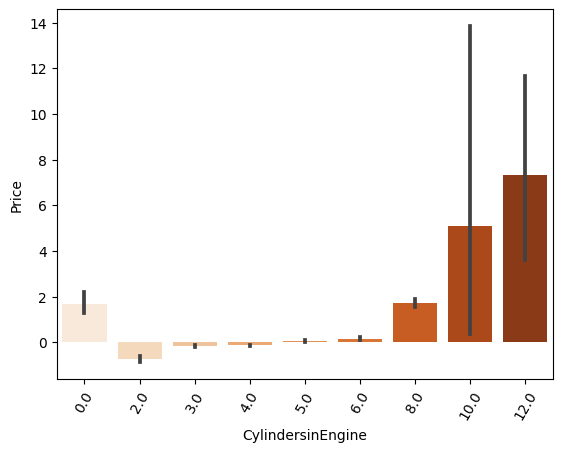

In [ ]:
sns.barplot(data=data, x='CylindersinEngine', y='Price', palette='Oranges')
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SUV'),
  Text(1, 0, 'Hatchback'),
  Text(2, 0, 'Coupe'),
  Text(3, 0, 'Commercial'),
  Text(4, 0, 'Ute / Tray'),
  Text(5, 0, 'Sedan'),
  Text(6, 0, 'People Mover'),
  Text(7, 0, 'Convertible'),
  Text(8, 0, 'Wagon'),
  Text(9, 0, 'Other')])

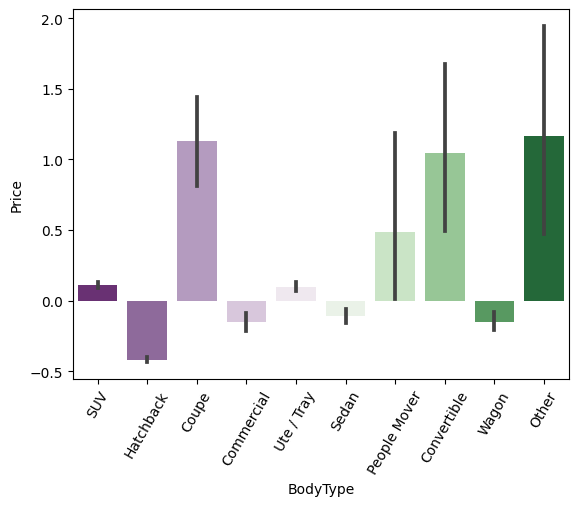

In [ ]:
sns.barplot(data=data, x='BodyType', y='Price', palette='PRGn')
plt.xticks(rotation = 60)

In [ ]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot


def shapiro_test(data:pd.DataFrame, col:str):
    stat, p_value = shapiro(data[col])
    if p_value < 0.05:
        return p_value, 'No Normal Ditribution'
    else:
        return p_value, 'Normal Distribution'

def univariate_numerical_plot(data:pd.DataFrame, var:str):
  """
  Args:
    - data(pd.DataFrame): data.
    - var(str):variable a trazar.
  """
  ax = plt.figure(constrained_layout = False, figsize = (12,5.8)).subplot_mosaic("""AD
                                                                                 BD""")
  sns.boxenplot(data, x= var, ax = ax['A'], color = 'lime')

  sns.stripplot(data, x = var, alpha = 0.5, color = 'darkblue', ax = ax['A'])
  sns.histplot(data, x = var, kde = True,line_kws = {'linewidth':1.8}, color = '#FF5733', ax = ax['B'])
  qqplot(data[var], line = 's', ax = ax['D'])




  ## Creates variables for later use
  df_info = data[var].describe()
  skewness = data[var].skew()
  kurtosis = data[var].kurtosis()

  ## Plots
  ax['A'].set_xlabel('')
  ax['A'].set_title(f'Mean={round(df_info[1],2)} | Std={round(df_info[2],2)} | Median={round(df_info[5],2)}', fontsize = 9, fontweight='bold')
  ax['B'].set_title(f'Skew={round(skewness,2)} | Kurtosis={round(kurtosis,2)}', fontsize = 9, fontweight='bold')
  ax['B'].set_xlabel('')
  ax['D'].set_title(f'QQ-Plot | Shapiro test: p-value={round(shapiro_test(data,var)[0],3)} | {shapiro_test(data,var)[1]}',fontsize=9, fontweight='bold')
  plt.suptitle(f'Distribution of variable {var}',fontsize = 14, fontweight = 'bold', color = 'darkred')

  plt.tight_layout()
  plt.subplots_adjust(top=0.9)
  plt.show()

def num_vs_cat_variables(data:pd.DataFrame, var_num:str, var_cat:str):

    ax = plt.figure(constrained_layout = False, figsize = (19, 8)).subplot_mosaic("""AD
                                                                               BD""")

    PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'red'},
    'medianprops':{'color':'red'},
    'whiskerprops':{'color':'red'},
    'capprops':{'color':'red'}
}


    sns.boxplot(data=data, y=var_num, ax=ax['D'], showfliers=False, **PROPS)
    sns.stripplot(data=data, y=var_num, alpha=0.2, hue=var_cat, ax=ax['D'], legend=False)
    sns.histplot(data=data, x=var_num, hue=var_cat, line_kws={'linewidth': 1.8}, ax=ax['B'], legend=False)
    sns.kdeplot(data=data, x=var_num, hue=var_cat, ax=ax['A'], legend=False)


    ax['A'].set_xlabel('')
    ax['B'].set_xlabel('')
    plt.suptitle(f'Distribution of variable {var_num} by {var_cat}',fontsize = 14, fontweight = 'bold', color = 'darkred')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

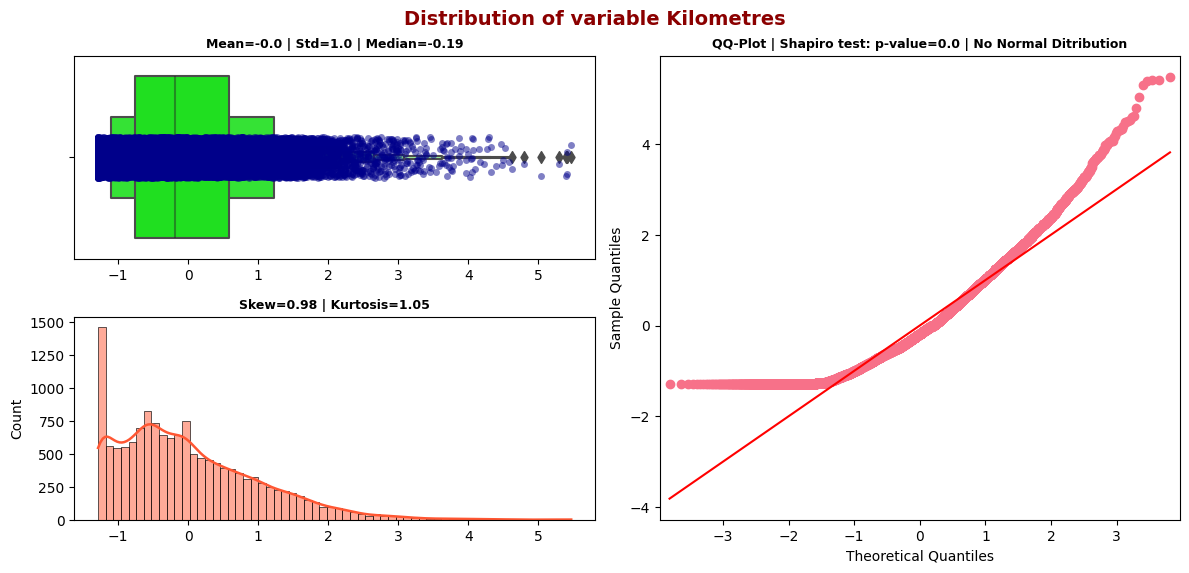

In [ ]:
%matplotlib inline
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

univariate_numerical_plot(data, numerical_columns[1])

# Data Encoding
##Convert the categorical features to numeric

In [ ]:
# Encoding all the categorical features
data['Brand'] = lb.fit_transform(data['Brand'])
data['Model'] = lb.fit_transform(data['Model'])
data['Car/Suv'] = lb.fit_transform(data['Car/Suv'])
data['UsedOrNew'] = lb.fit_transform(data['UsedOrNew'])
data['Transmission'] = lb.fit_transform(data['Transmission'])
data['Engine'] = lb.fit_transform(data['Engine'])
data['DriveType'] = lb.fit_transform(data['DriveType'])
data['FuelConsumption'] = lb.fit_transform(data['FuelConsumption'])
data['ColourExtInt'] = lb.fit_transform(data['ColourExtInt'])
data['Location'] = lb.fit_transform(data['Location'])
data['FuelType'] = lb.fit_transform(data['FuelType'])
data['CylindersinEngine'] = lb.fit_transform(data['CylindersinEngine'])
data['BodyType'] = lb.fit_transform(data['BodyType'])
data['Doors'] = lb.fit_transform(data['Doors'])
data['Seats'] = lb.fit_transform(data['Seats'])
data['Title'] = lb.fit_transform(data['Title'])

In [ ]:
data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,56,1.174099,517,202,6626,0,0,14,1,0,60,-1.213578,567,105,3,6,2,5,0.585928
1,37,1.174099,413,85,6482,2,0,7,2,6,40,-1.285219,27,73,3,3,3,3,-0.516339
2,4,1.174099,55,60,6303,2,0,12,4,6,39,-1.176634,347,502,3,2,0,2,2.549272
3,42,-1.061728,229,60,1427,2,0,46,4,6,83,0.467602,606,355,6,2,0,2,-0.068543
4,51,1.174099,107,188,6596,2,0,5,2,7,33,-1.272133,257,111,3,6,2,3,0.000349


<Axes: >

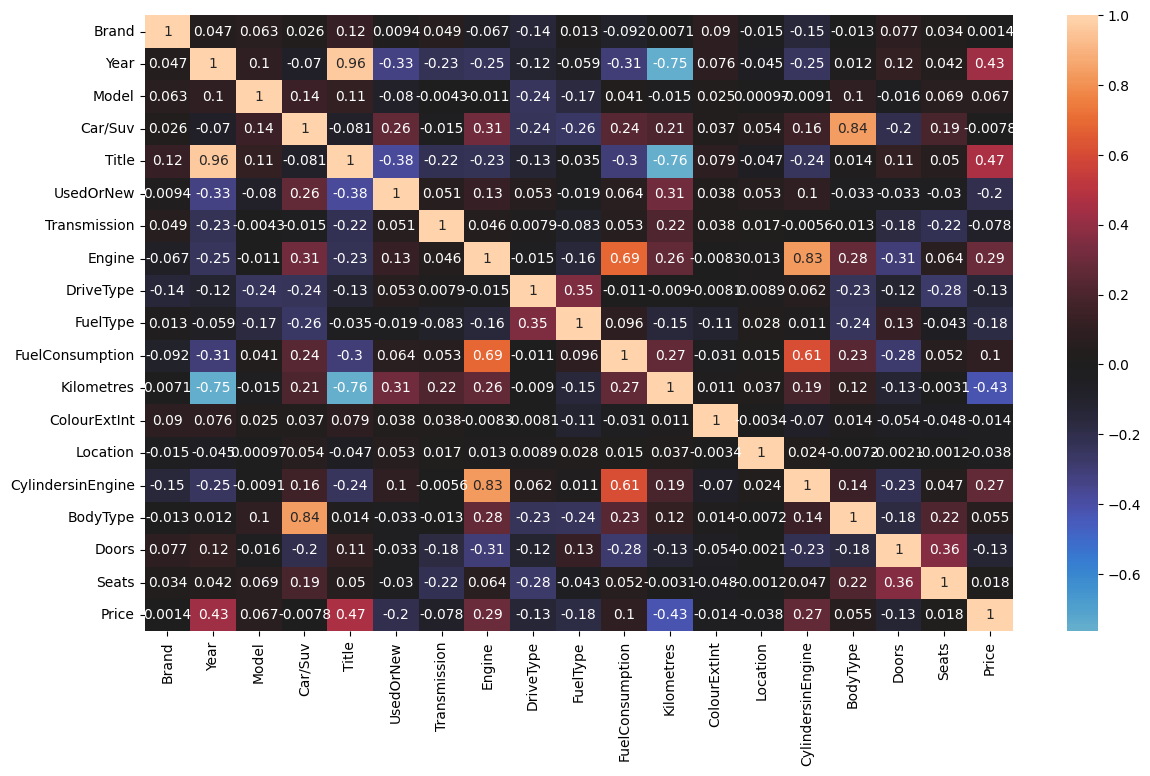

In [ ]:
# Checking Multicolinearity using correlation matrix
corr_matrix=data.corr()
plt.figure(1, figsize=(14,8))
sns.heatmap(corr_matrix,center=0, annot=True)

In [ ]:
data.drop(['CylindersinEngine'], axis=1, inplace=True)
data.dropna(inplace=True)

In [ ]:
print("The shape of the encoded dataset: ",data.shape)

The shape of the encoded dataset:  (14550, 18)


# Data Splitting
Split the dataset into
- Input and output
- Training and test sets

In [ ]:
X = data.drop(columns='Price')
y = data['Price']

In [ ]:
X.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,BodyType,Doors,Seats
0,56,1.174099,517,202,6626,0,0,14,1,0,60,-1.213578,567,105,6,2,5
1,37,1.174099,413,85,6482,2,0,7,2,6,40,-1.285219,27,73,3,3,3
2,4,1.174099,55,60,6303,2,0,12,4,6,39,-1.176634,347,502,2,0,2
3,42,-1.061728,229,60,1427,2,0,46,4,6,83,0.467602,606,355,2,0,2
4,51,1.174099,107,188,6596,2,0,5,2,7,33,-1.272133,257,111,6,2,3


In [ ]:
y.head()

0    0.585928
1   -0.516339
2    2.549272
3   -0.068543
4    0.000349
Name: Price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn
#from sklearn.ensemble import GradientBoostClassifier

!pip install --upgrade scikit-learn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (11640, 17)

y_train: (11640,)

------------------------

X_test: (2910, 17)

y_test: (2910,)


# Linear Regression

Train a linear regression model and calculate its $R^2$ (r2_score) for training and test sets

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred)
    print("The R2 value for the test set is: ", r2_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("Mean Absolute Error-", mae)
    print("Mean Squared Error-", mse)

In [ ]:
linear_regression = LinearRegression()
evaluate_model(linear_regression, X_train, y_train, X_test, y_test)

The R2 value for the test set is:  0.4907092324427187

Mean Absolute Error- 0.36787965763761454

Mean Squared Error- 0.42704057270828394


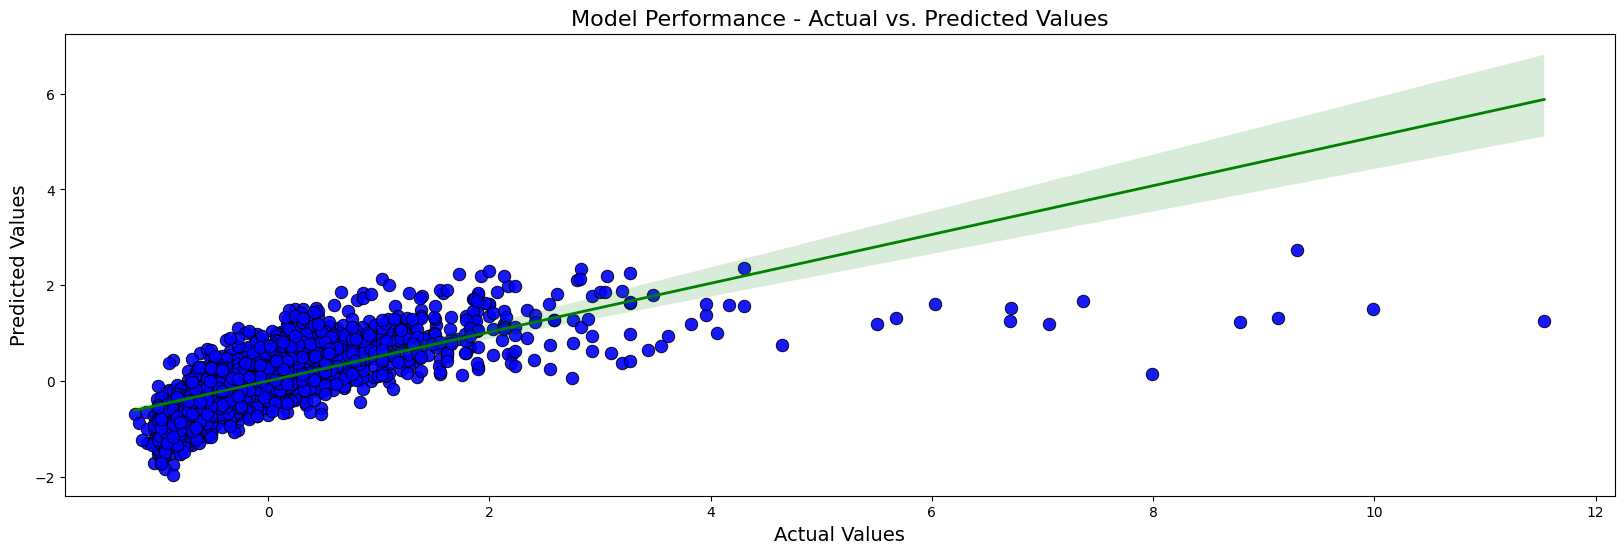

In [ ]:
# Predicted values vs actual values
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt  # Import for plotting functionality
import seaborn as sns

plt.figure(figsize=(20, 6))

linear_regression = LinearRegression().fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.9, edgecolor='k', s=80)

sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "green", "lw": 2})

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error-", mae)
print("Mean Squared Error-", mse)
print("r2 score-", r2)

Mean Absolute Error- 0.16075145464721433

Mean Squared Error- 0.13677591901210595

r2 score- 0.8368803405839084


y_test type: <class 'pandas.core.series.Series'>

y_pred type: <class 'numpy.ndarray'>


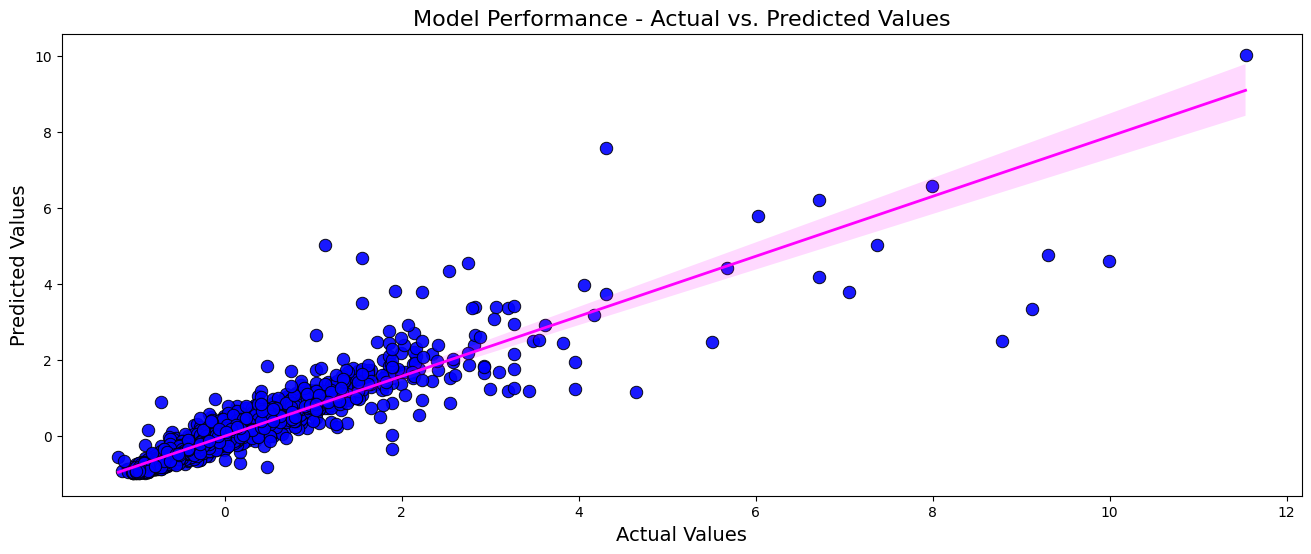

In [ ]:
# Check the data types
print("y_test type:", type(y_test))
print("y_pred type:", type(y_pred))

# Reshape the arrays if necessary
if y_test.ndim > 1:
    y_test = y_test.reshape(-1)
if y_pred.ndim > 1:
    y_pred = y_pred.reshape(-1)

# Plot the scatterplot
plt.figure(figsize=(16, 6))
sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.9, edgecolor='k', s=80)

# Plot the regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "magenta", "lw": 2})

# Set the labels and title
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)

# Display the plot
plt.show()

In [ ]:
# Import XGBoost
from xgboost import XGBRegressor

# Define the model
xgmodel = XGBRegressor(random_state=42)

# Fit the model
xgmodel.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# check score
print("XG boost model score is : ",xgmodel.score(X_test, y_test))


XG boost model score is :  0.8779737997182446


In [ ]:
# Run Prediction
y_pred = xgmodel.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE using squared=False
r_squared = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (Coefficient of Determination): {r_squared}")

Mean Absolute Error (MAE): 0.1568760145442327

Mean Squared Error (MSE): 0.1023190322174368

Root Mean Squared Error (RMSE): 0.3198734628215301

R-squared (Coefficient of Determination): 0.8779737997182446


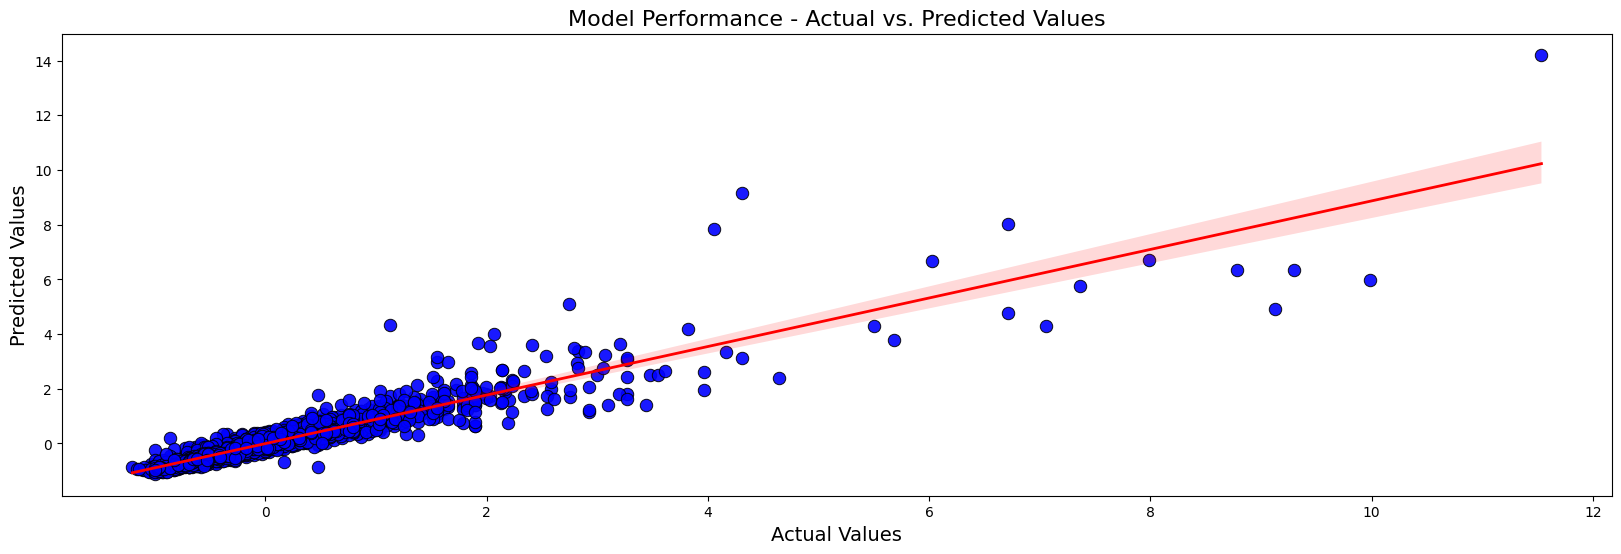

In [ ]:
plt.figure(figsize=(20, 6))

sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.9, edgecolor='k', s=80)

sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "red", "lw": 2})

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)

plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, auc


In [ ]:
from sklearn import svm
clf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

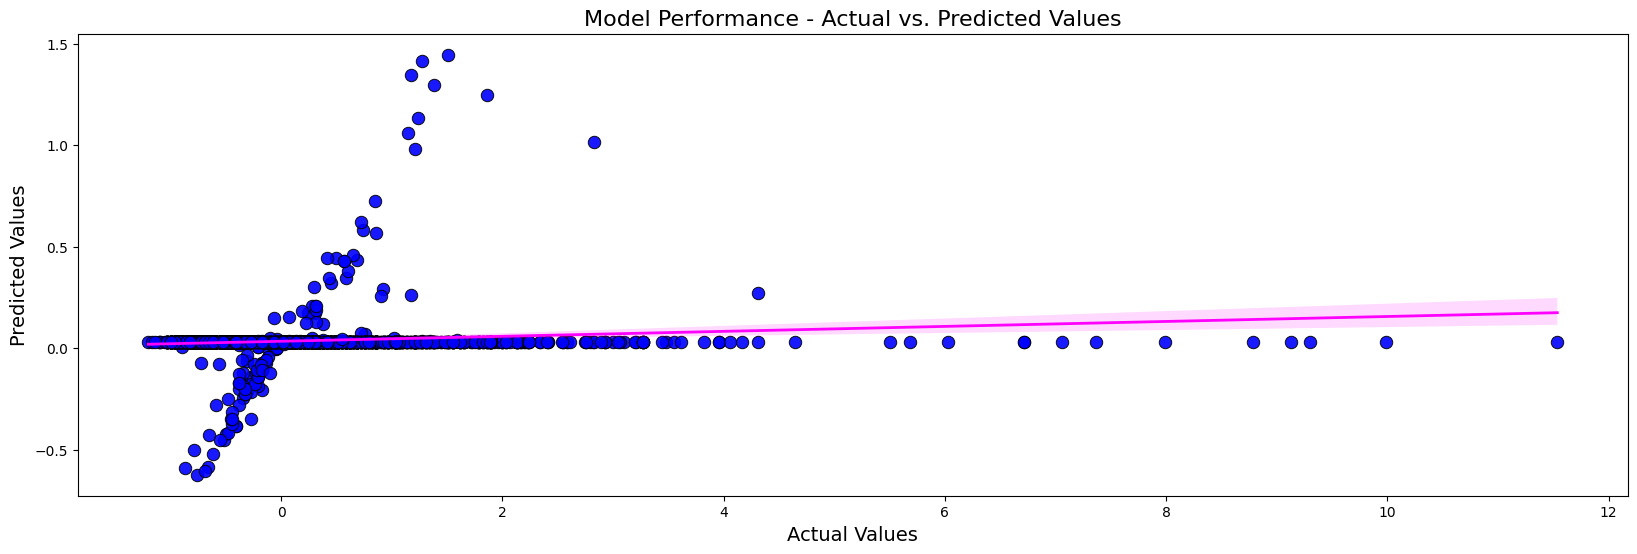

In [ ]:
plt.figure(figsize=(20, 6))

sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.9, edgecolor='k', s=80)

sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "magenta", "lw": 2})

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)

plt.show()

In [ ]:
# prompt: k nearest neighbour regressor

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1).fit(X_train, y_train)
y_predict = neigh.predict(X_test)
#print("Accuracy of the K-NN Regressor:", neigh.score(y_test, y_predict))


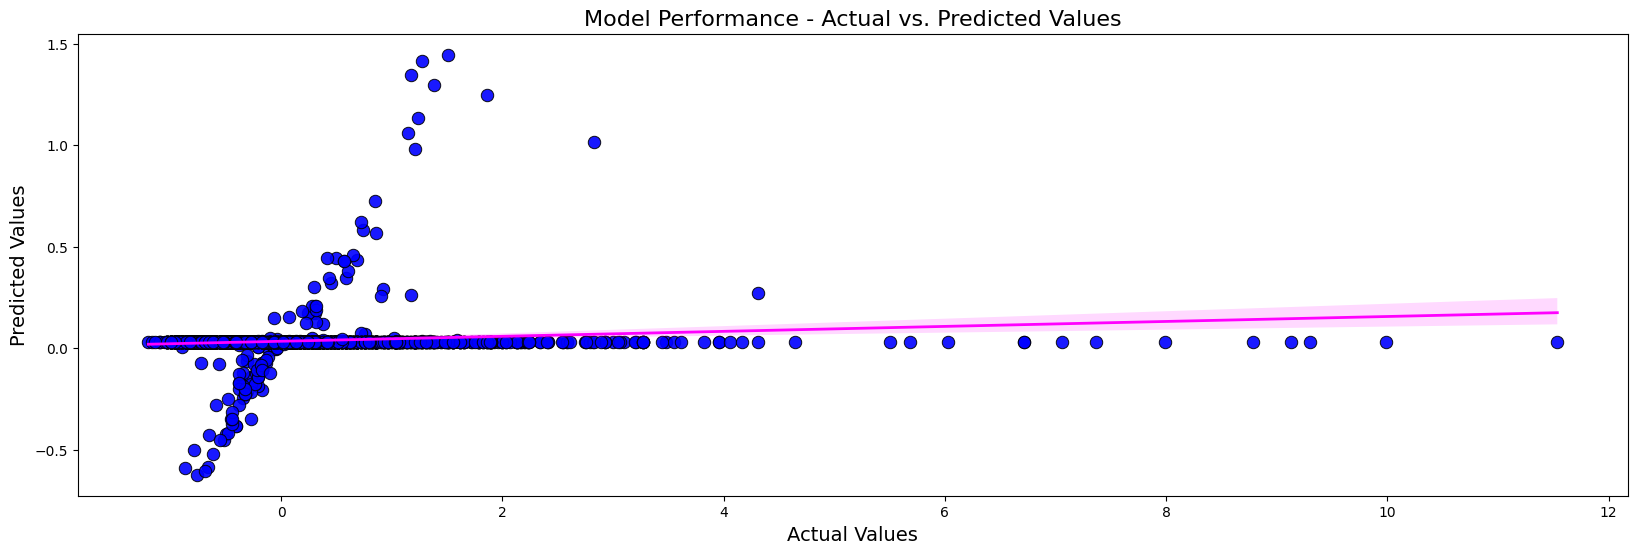

In [ ]:
plt.figure(figsize=(20, 6))

sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.9, edgecolor='k', s=80)

sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "magenta", "lw": 2})

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Define a dictionary to store results
results = {}

# List of regression algorithms
regression_algorithms = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor()
]

# Perform cross-validation for each algorithm
for model in regression_algorithms:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=3)  # Adjust scoring as needed
    results[model_name] = scores

# Display the results
for model_name, scores in results.items():
    print(model_name,"------------------------->", scores, sum(scores)/len(scores))

LinearRegression -------------------------> [0.4129783  0.43888121 0.51595885] 0.45593945492412485

Ridge -------------------------> [0.4129755  0.438882   0.51596443] 0.4559406457990427

Lasso -------------------------> [0.33936784 0.36074215 0.4358898 ] 0.3786665966265966

ElasticNet -------------------------> [0.35396574 0.37011033 0.45587606] 0.3933173800161951

DecisionTreeRegressor -------------------------> [0.64065024 0.69056997 0.56809854] 0.6331062476230278

RandomForestRegressor -------------------------> [0.74365111 0.75919988 0.78806098] 0.763637321418909

GradientBoostingRegressor -------------------------> [0.68227367 0.76993952 0.73822004] 0.7301444095345812

SVR -------------------------> [0.19228069 0.22349549 0.24442117] 0.22006578242184135

KNeighborsRegressor -------------------------> [0.2082203  0.17673554 0.19810434] 0.19435339273225494

MLPRegressor -------------------------> [-0.16622079 -1.4001987  -0.78040921] -0.7822762331767136

AdaBoostRegressor ---------

**No the model doesn't overfit , because the gap batween training accuracy and testing accuracy is small but the model in general isn't a good model as we can use a better model for better accuracy to get better regressions.**

In [ ]:
import pandas as pd

# Assuming the metrics have been calculated and stored in variables as follows:
# For Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

# For Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

# Create a DataFrame to display these metrics
metrics_data = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2) value'],
    'Linear Regression': [mae_lr, mse_lr, rmse_lr, r2_lr],
    'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Metric', inplace=True)

# Display the DataFrame
metrics_df

,Linear Regression,Random Forest
Metric,,
Mean Absolute Error (MAE),0.577301,0.577301
Mean Squared Error (MSE),0.829060,0.829060
Root Mean Squared Error (RMSE),0.910527,0.910527
R-squared (R2) value,0.011259,0.011259


In [ ]:
##Note- This code was prepared as a part of course project. All suggestions are welcomed.